# Create Figures and Tables

In [1]:
# Packages
import pandas as pd
import os
import matplotlib.pyplot as plt
from Graph_NN_Functions import *
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## Set Classifier Name

In [2]:
classifier_name = 'Graph Neural Network'

## List of Rating Models and Most Complex Model

In [3]:
model_names = ['exclude_previous_rating_model_1', 'exclude_previous_rating_model_2', 'exclude_previous_rating_model_3']
clean_model_names = ["Altman's Z", 'Financial Variables and Sector', 'Financial Variables, Sector, and NLP Features']
# set most_complex_model 
most_complex_model = 'exclude_previous_rating_model_3'

## Variable Index

In [4]:
# Load variable index
variable_index = pd.read_excel('../../../Variable Index.xlsx')
variable_index

,column_name,Clean Column Name,Variable Type,Data Type,Ratio?,Notes,Rating Model 1,Rating Model 2,Rating Model 3,Change Model 1,Change Model 2,Change Model 3
0,Altman_Z,Altman's Z Score,Altman's Z Score,Numeric,Y,NaN,X,NaN,NaN,X,NaN,NaN
1,EBIT,EBIT,Constructed for Altman's Z,Numeric,NaN,NaN,NaN,X,X,NaN,X,X
2,common_plus_preferred_stock,Common Plus Preferred Stock,Constructed for Altman's Z,Numeric,NaN,NaN,NaN,X,X,NaN,X,X
3,workingCapital,Working Capital,Constructed for Altman's Z,Numeric,NaN,NaN,NaN,X,X,NaN,X,X
4,Ratio_A,Ratio A,Constructed for Altman's Z,Numeric,Y,NaN,NaN,X,X,NaN,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...
200,operatingCashFlowPerShare_diff,Difference in Operating Cash Flow Per Share fr...,Additional Change Ratios,Numeric,NaN,"Primarily for changes models, but can be used ...",NaN,NaN,NaN,NaN,X,X
201,freeCashFlowPerShare_diff,Difference in Free Cash Flow Per Share from pr...,Additional Change Ratios,Numeric,NaN,"Primarily for changes models, but can be used ...",NaN,NaN,NaN,NaN,X,X
202,cashPerShare_diff,Difference in Cash Per Share from prior fixed ...,Additional Change Ratios,Numeric,NaN,"Primarily for changes models, but can be used ...",NaN,NaN,NaN,NaN,X,X
203,operatingCashFlowToSales_diff,Difference in Operating Cash Flow to Sales fro...,Additional Change Ratios,Numeric,NaN,"Primarily for changes models, but can be used ...",NaN,NaN,NaN,NaN,X,X


## Mapping

In [5]:
# Get custom mapping
_, _, _, custom_mapping = get_column_names_and_mapping(most_complex_model)

## Model Comparison Table

In [6]:
# Iterate over Transductive and Inductive
for transductive_inductive in ['Transductive', 'Inductive']:

    # Create list of df rows
    model_comparison_rows = []
    majority_baselines = []
    for model_name, clean_model_name in zip(model_names, clean_model_names):

        # Load predictions file
        predictions = pd.read_excel('../../../Data/Predictions/' + classifier_name + '/' + transductive_inductive + '/' +  model_name + '_predictions.xlsx')
        #print(predictions)

        # Accuracy
        accuracy = (predictions['target'] == predictions['pred']).mean()

        # Close/exact share <= 1 from the target
        y_test_num = predictions['target'].map(custom_mapping)
        y_pred_num = predictions['pred'].map(custom_mapping)
        close_exact_share = round(((y_test_num - y_pred_num).abs() <= 1).mean(), 4)

        # Create dataframe row
        model_comparison_row = pd.DataFrame({
            'Model/Baseline': [clean_model_name],
            'Accuracy': [accuracy]#,
            #'Share $\\le$ 1 Rating From Actual': [str(close_exact_share)]
        })
        model_comparison_rows.append(model_comparison_row)

        # Majority baseline
        majority_baseline = max(predictions['target'].value_counts(normalize=True))
        majority_baselines.append(majority_baseline)

    # Concatenate rows
    model_comparison_df = pd.concat(model_comparison_rows)

    # Check majority baselines are the same
    print('Majority baselines are the same:', all([majority_baseline == majority_baselines[0] for majority_baseline in majority_baselines]))
    # Add row with Model/Baseline = 'Most Common Class Baseline' and Accuracy = majority_baseline[0]
    model_comparison_df = pd.concat([model_comparison_df, pd.DataFrame({
        'Model/Baseline': ['Most Common Class Baseline'],
        'Accuracy': [majority_baselines[0]]#,
        #'Share $\\le$ 1 Rating From Actual': ['']
    })])

    # Export to Excel
    # create directory if it doesn't exist
    if not os.path.exists('../../../Output/Modelling/' + classifier_name + '/Tables/'):
        os.makedirs('../../../Output/Modelling/' + classifier_name + '/Tables/')
    model_comparison_df.to_excel('../../../Output/Modelling/' + classifier_name + '/Tables/' + transductive_inductive + '_model_comparison_df.xlsx', index = False)

    # Export to LaTeX
    # Format columns
    for col in model_comparison_df.columns:
        model_comparison_df[col] = model_comparison_df[col].apply(lambda x: f'{x:.4f}' if isinstance(x, float) else x)
    # Center all columns
    lt_string = model_comparison_df.to_latex(index=False, column_format='c' * len(model_comparison_df.columns), escape=False)
    #latex_with_font_size = "\\tiny\n" + lt_string + "\n\\normalsize"
    latex_with_font_size = "\\footnotesize\n" + lt_string + "\n\\normalsize"
    with open('../../../Output/Modelling/' + classifier_name + '/Tables/' + transductive_inductive + '_model_comparison_df.tex', 'w') as f:
        f.write(latex_with_font_size)

    print(model_comparison_df)

Majority baselines are the same: True
                                  Model/Baseline Accuracy
0                                     Altman's Z   0.3571
0                 Financial Variables and Sector   0.6633
0  Financial Variables, Sector, and NLP Features   0.6765
0                     Most Common Class Baseline   0.3276
Majority baselines are the same: True
                                  Model/Baseline Accuracy
0                                     Altman's Z   0.3551
0                 Financial Variables and Sector   0.6653
0  Financial Variables, Sector, and NLP Features   0.6837
0                     Most Common Class Baseline   0.3276


## Confusion Matrices

Value counts for target:
target
BBB    321
BB     227
A      194
B      140
AA      50
AAA     24
CCC     19
C        4
D        1
Name: count, dtype: int64
Value counts for pred:
pred
BBB    367
BB     280
A      184
B      107
AA      17
AAA     15
CCC     10
Name: count, dtype: int64
label:  AAA
label:  AA
label:  A
label:  BBB
label:  BB
label:  B
label:  CCC
label:  C
label:  D
actual labels
['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'C', 'D']


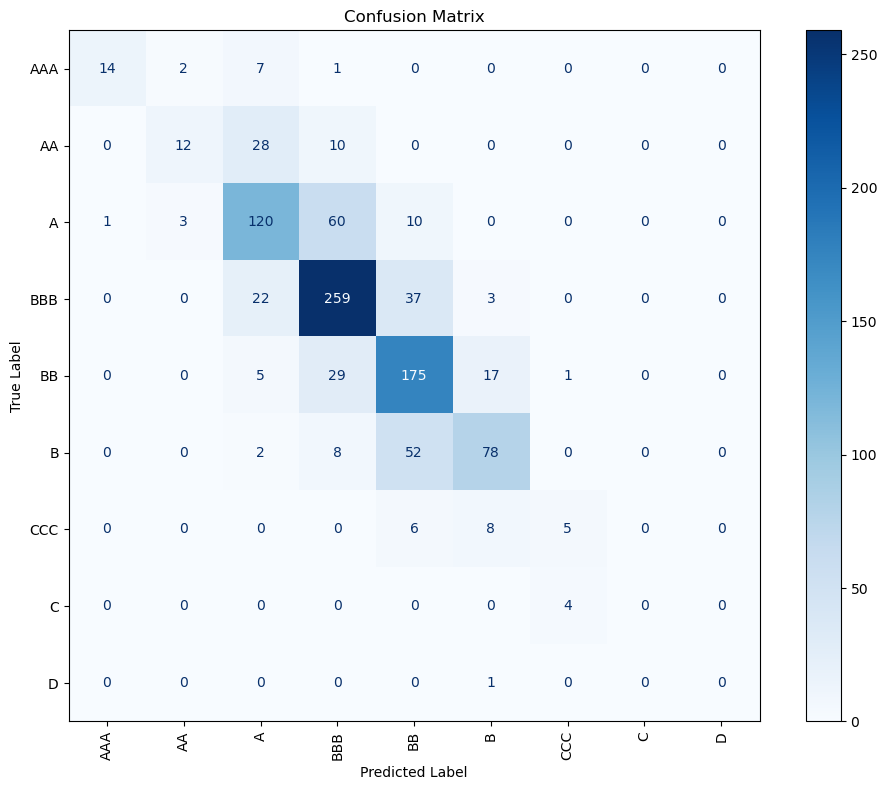

Value counts for target:
target
BBB    321
BB     227
A      194
B      140
AA      50
AAA     24
CCC     19
C        4
D        1
Name: count, dtype: int64
Value counts for pred:
pred
BBB    380
BB     263
A      188
B      104
AAA     17
AA      16
CCC     12
Name: count, dtype: int64
label:  AAA
label:  AA
label:  A
label:  BBB
label:  BB
label:  B
label:  CCC
label:  C
label:  D
actual labels
['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'C', 'D']


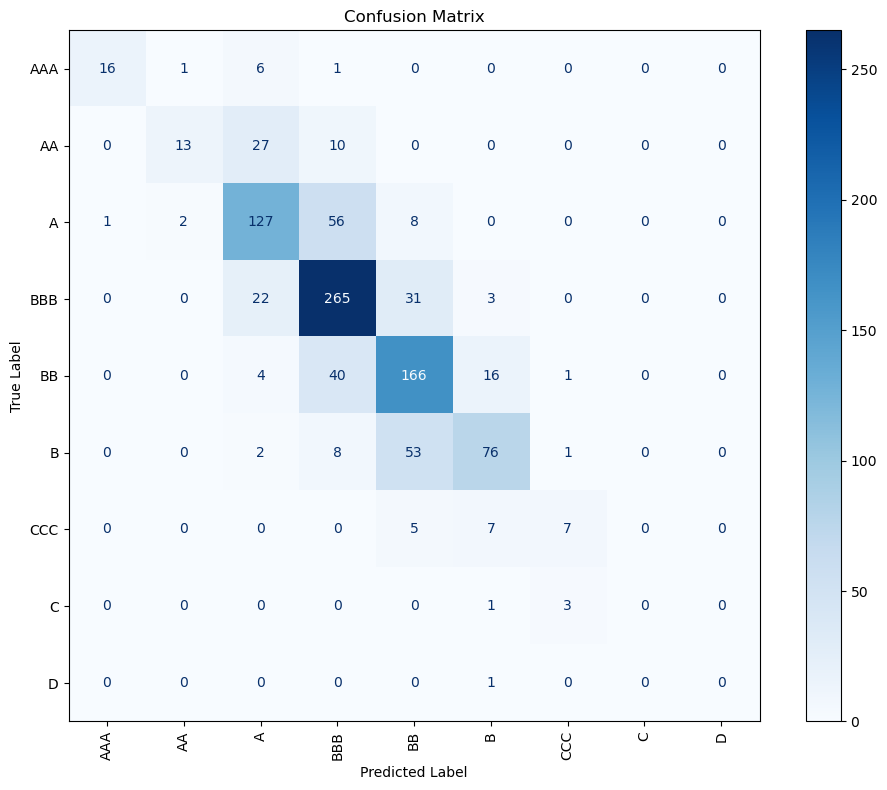

In [7]:
# Iterate over Transductive and Inductive
for transductive_inductive in ['Transductive', 'Inductive']:

    # Load predictions file for most complex model
    predictions = pd.read_excel('../../../Data/Predictions/' + classifier_name + '/' + transductive_inductive + '/' +  most_complex_model + '_predictions.xlsx')

    # Value counts for target and pred
    print('Value counts for target:')
    print(predictions['target'].value_counts())
    print('Value counts for pred:')
    print(predictions['pred'].value_counts())

    # Create y_test and y_pred
    y_test = predictions['target']
    y_pred = predictions['pred']
    y_test_num = predictions['target'].map(custom_mapping)
    y_pred_num = predictions['pred'].map(custom_mapping)

    # Labels
    actual_labels = list(custom_mapping.keys())
    # Discard values not in y_test or y_pred
    actual_labels = [label for label in actual_labels if label in y_test.unique() or label in y_pred.unique()]
    #print('actual labels')
    # Recode labels - if contains 'Upgrade', set to 'Upgrade', if contains 'Downgrade', set to 'Downgrade', if contains 'Same', set to 'Same'
    actual_labels_recoded = []
    for label in actual_labels:
        print('label: ', label)
        if 'Upgrade' in label:
            actual_labels_recoded.append('Upgrade')
        elif 'Downgrade' in label:
            actual_labels_recoded.append('Downgrade')
        elif 'Same' in label:
            actual_labels_recoded.append('Same')
        else:
            actual_labels_recoded.append(label)
    actual_labels = actual_labels_recoded
    print('actual labels')
    print(actual_labels)
    #ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=actual_labels).plot(cmap='Blues')
    conf_matrix = confusion_matrix(y_test_num, y_pred_num)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                        display_labels=actual_labels
                                        )

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    # Save as _no_title
    plt.savefig('../../../Output/Modelling/Graph Neural Network/' + transductive_inductive + '/confusion_matrix_no_title.png')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    # Save
    plt.savefig('../../../Output/Modelling/Graph Neural Network/' + transductive_inductive + '/confusion_matrix.png')
    plt.show()